In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math as mymath
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [15]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/Project/spotify-youtube.csv"
data= pd.read_csv(file)


In [16]:
data

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [18]:
data.head(5)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [19]:
data.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [20]:
# checking the dataset for missing values
print(data.isnull().sum())

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64


In [30]:
# To drop all missing values
data.dropna(axis=0, inplace=True)

In [31]:
data.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04
mean,10434.934637,0.621178,0.636150,5.292645,-7.615305,0.094944,0.287817,0.055476,0.191322,0.528267,120.607345,2.247612e+05,9.719768e+07,6.823531e+05,2.838656e+04,1.382746e+08
std,5989.698716,0.165533,0.213439,3.579947,4.617605,0.104931,0.285630,0.192768,0.165217,0.244996,29.588308,1.278468e+05,2.799997e+08,1.820550e+06,1.977979e+05,2.477309e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,5240.500000,0.520000,0.510000,2.000000,-8.745000,0.035700,0.043600,0.000000,0.094100,0.338000,96.997500,1.802670e+05,2.070213e+06,2.447350e+04,5.830000e+02,1.786937e+07
50%,10500.500000,0.639000,0.667000,5.000000,-6.504000,0.050600,0.188000,0.000002,0.125000,0.535000,119.969000,2.133210e+05,1.568959e+07,1.332770e+05,3.515500e+03,5.037938e+07
75%,15640.750000,0.742000,0.798000,8.000000,-4.918500,0.104000,0.469000,0.000436,0.234000,0.724000,139.946000,2.519630e+05,7.369040e+07,5.423462e+05,1.494100e+04,1.407579e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [32]:
print(data.isnull().sum())

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [33]:
data.duplicated().sum()

0

In [ ]:
# Exploratory Data Analysis

plot.hist(myexp)
plot.title("Histogram")
plot.xlabel("Expenses")
plot.ylabel("Frequency")
plot.show()

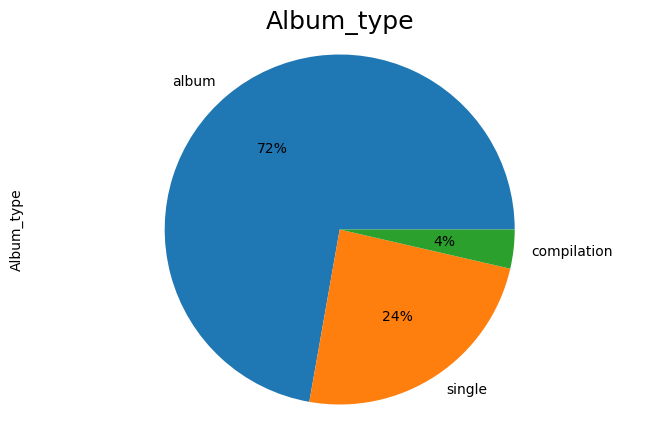

In [36]:
# Visualize the distribution of Album_type
plt.figure(figsize=(8,5))
data.Album_type.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title("Album_type", fontsize='18')
plt.show()

C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\2071558558.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_view_album = data.groupby('Album_type').sum().sort_values('Views',ascending=False).reset_index()


Text(0.5, 0.98, 'Total album types')

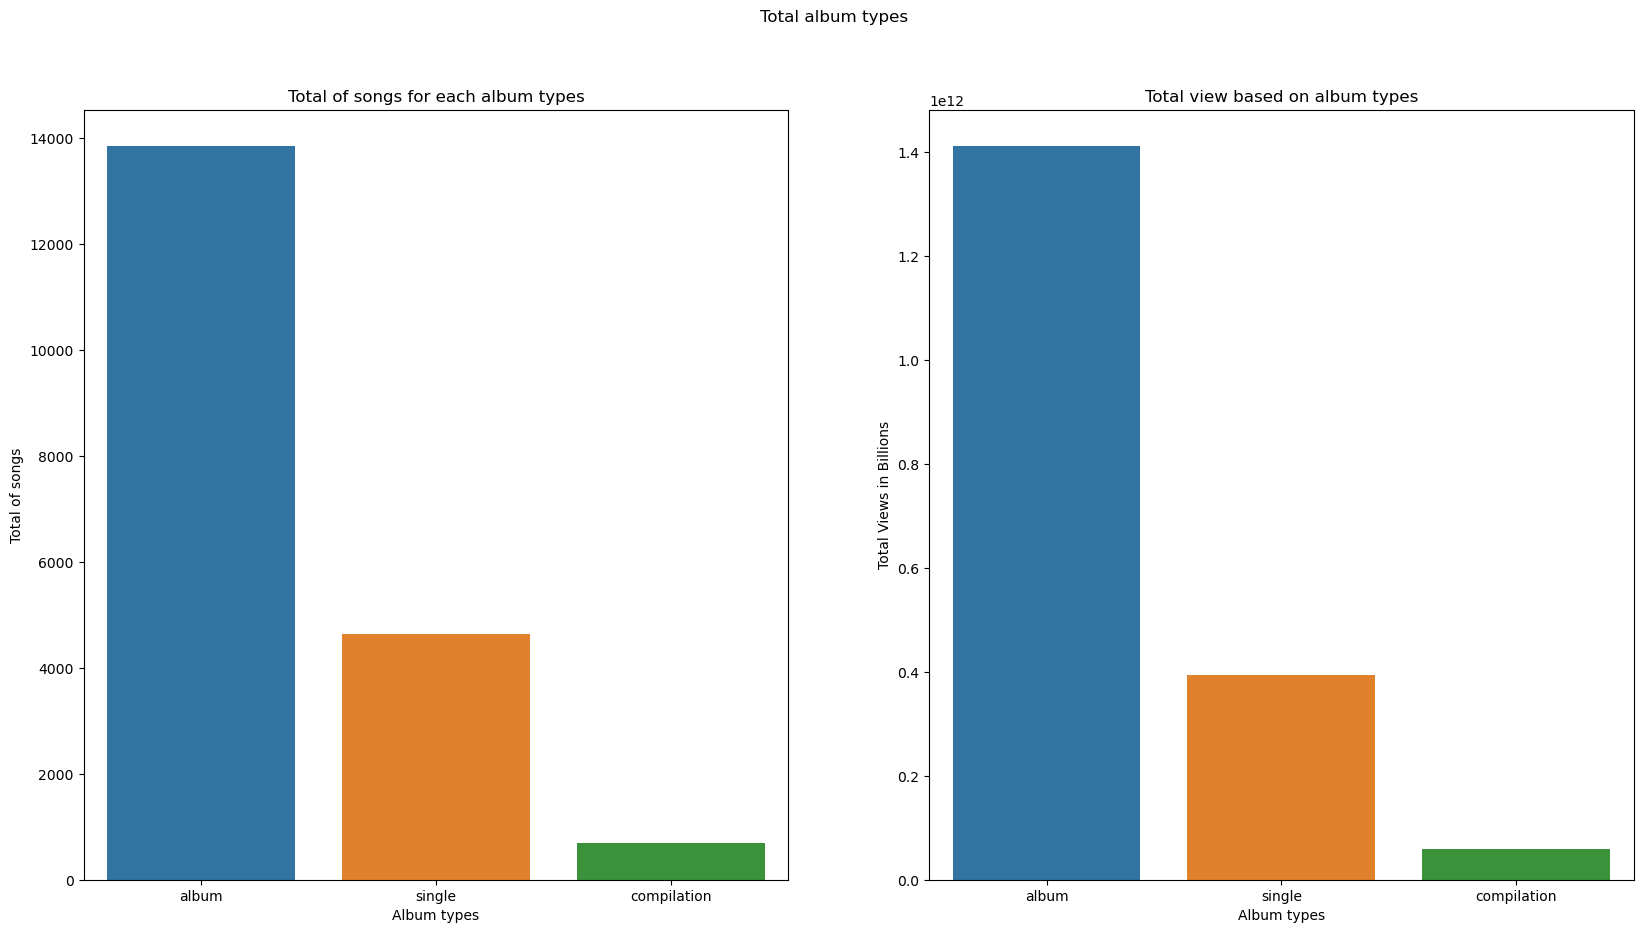

In [44]:
def formatter(x, pos):
    return str(round(x / 1e9, 1))
def millformatter(x, pos):
    return str(round(x / 1e6, 1)) 

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(20,10))

sns.countplot(data,x='Album_type',ax=ax1)
ax1.set_title("Total of songs for each album types")
ax1.set_ylabel("Total of songs")
ax1.set_xlabel("Album types")


most_view_album = data.groupby('Album_type').sum().sort_values('Views',ascending=False).reset_index()
sns.barplot(most_view_album,y='Views',x='Album_type',ax=ax2)

ax2.set_title("Total view based on album types")
ax2.set_ylabel("Total Views in Billions")
ax2.set_xlabel("Album types")
#ax2.yaxis.set_major_formatter(formatter)
#ax2.yaxis.set_minor_formatter(NullFormatter())

fig.suptitle("Total album types")

C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\3721996543.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_view_track = data.groupby('Track').sum().sort_values('Views',ascending=False).reset_index().head(10)
C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\3721996543.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_likes_track = data.groupby('Track').sum().sort_values('Likes',ascending=False).reset_index().head(10)
C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\3721996543.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, nu

Text(0.5, 0.98, 'Top 10 of track')

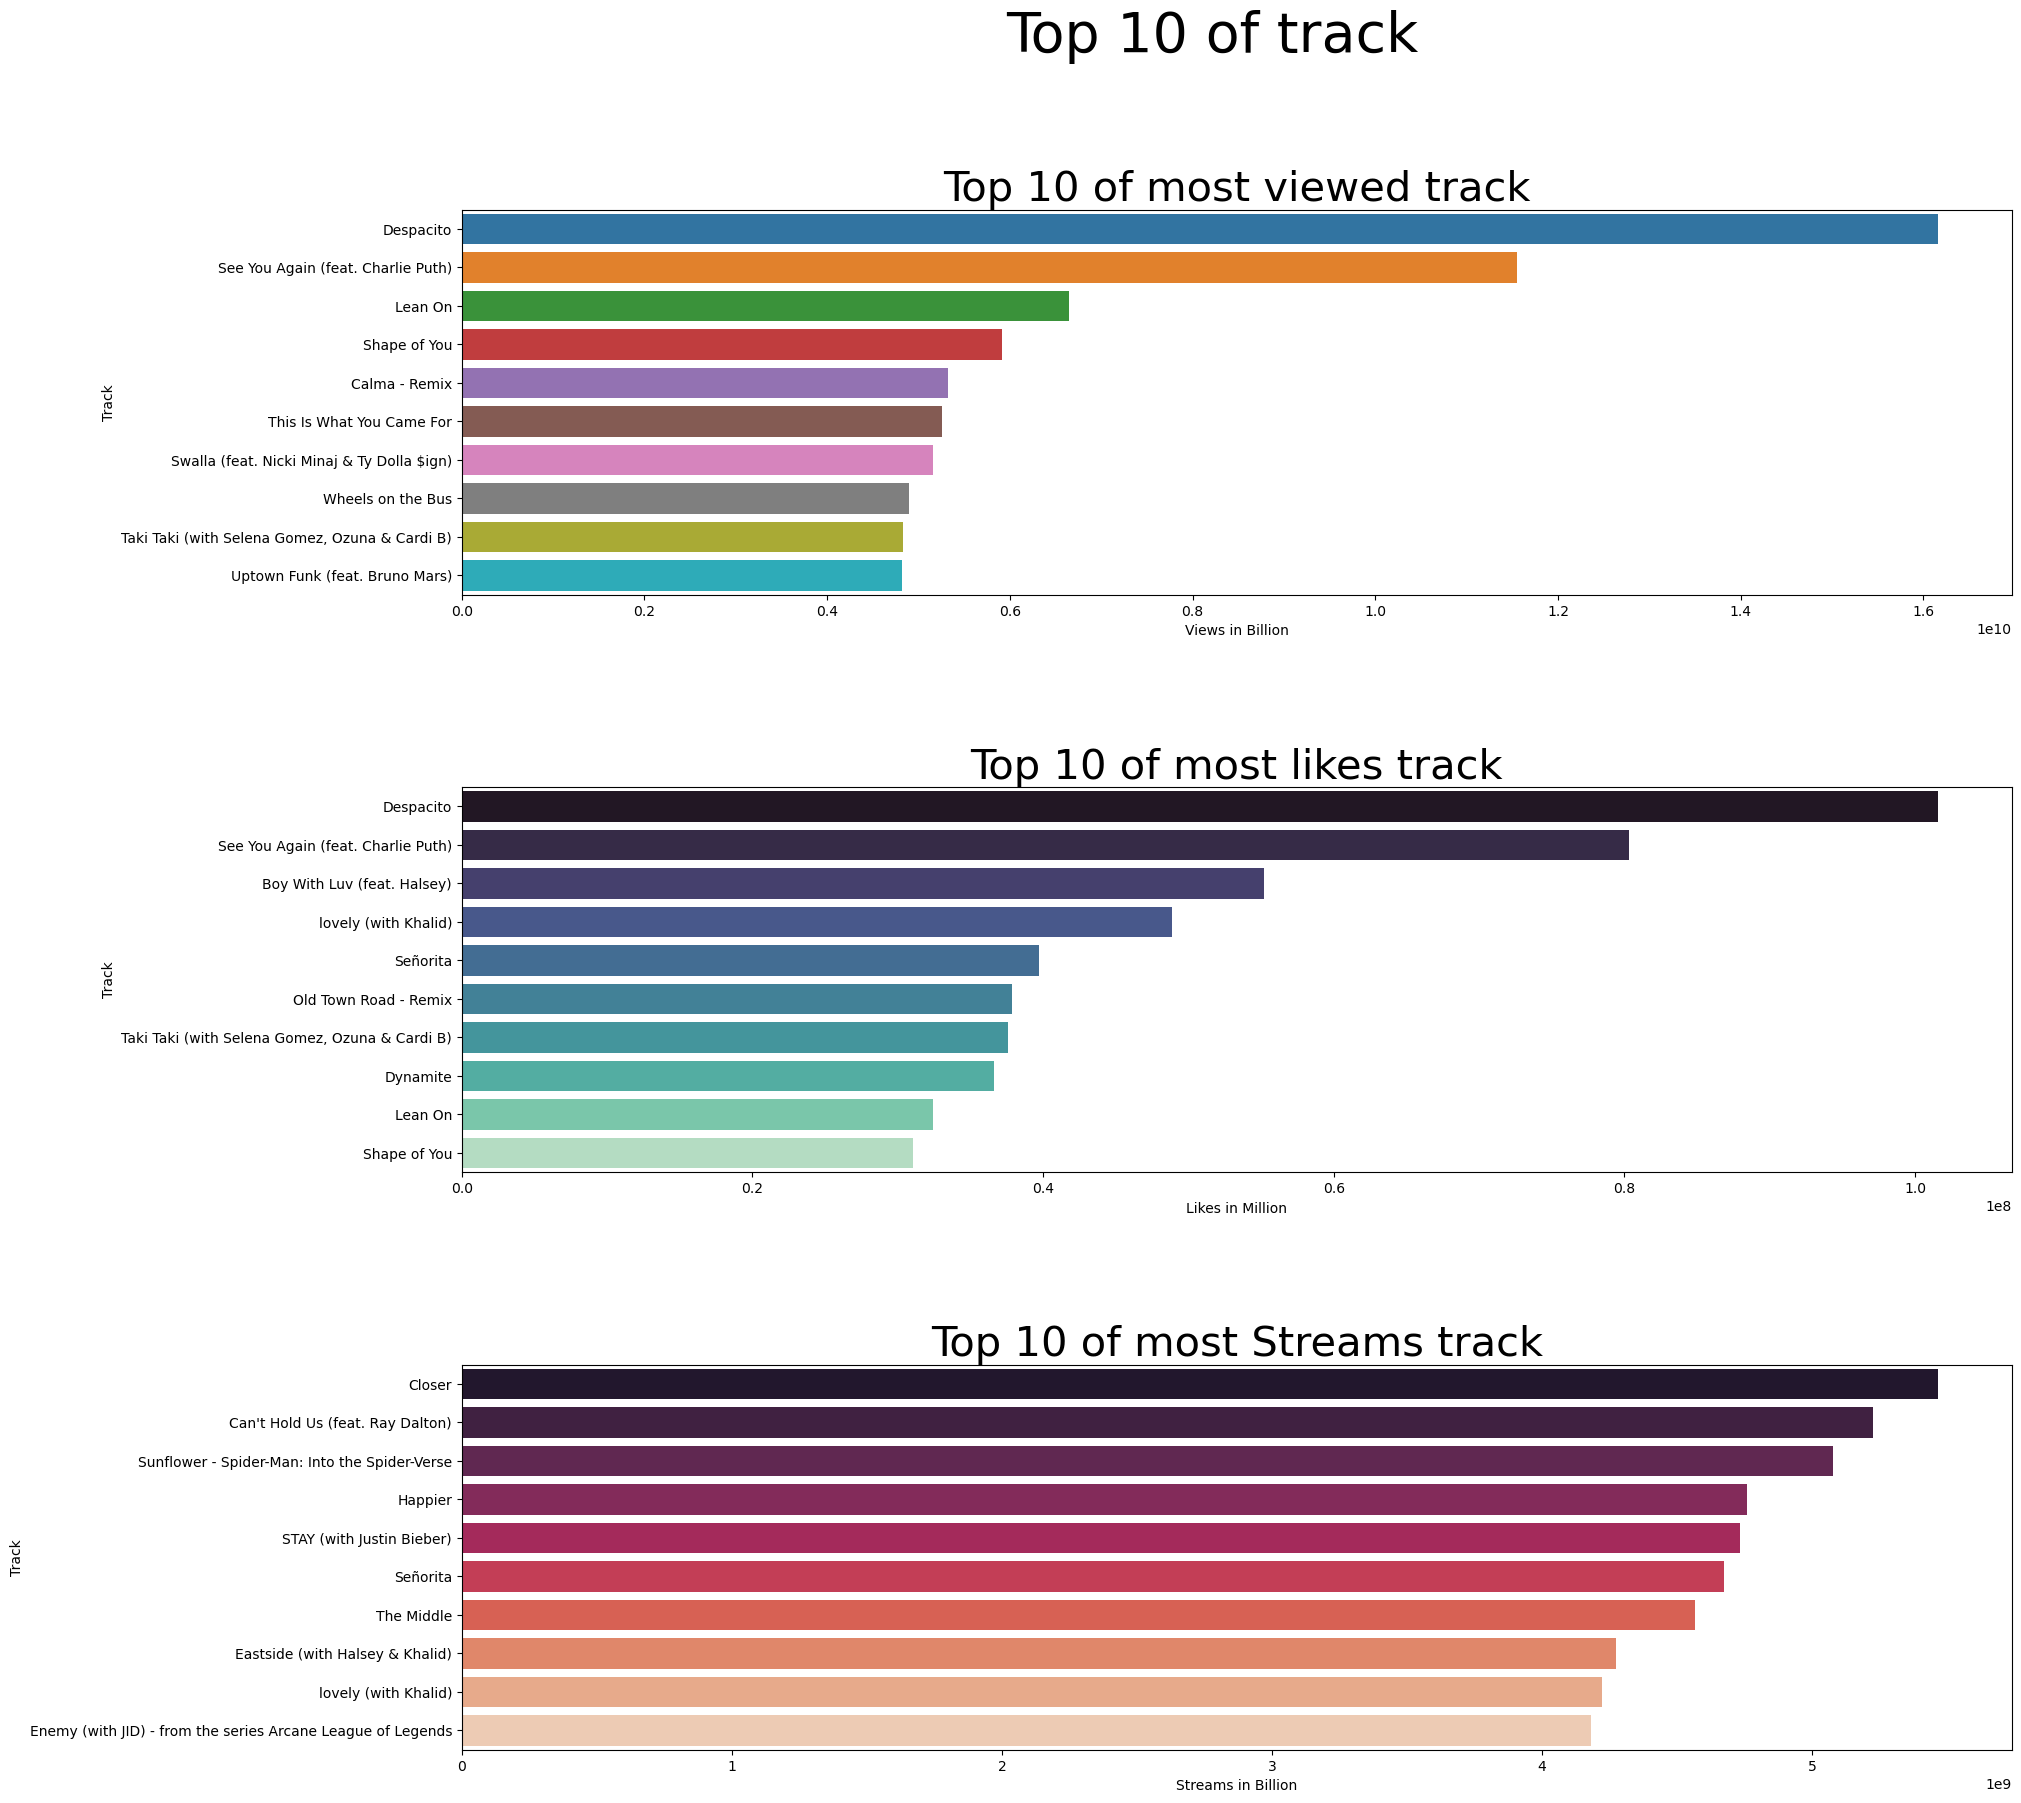

In [46]:
# Which track have the most view and likes on Youtube and stream on Spotify
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize= (20,20))
fig.subplots_adjust(hspace=0.5)
most_view_track = data.groupby('Track').sum().sort_values('Views',ascending=False).reset_index().head(10)
sns.barplot(most_view_track,x='Views',y='Track',ax=ax1)

ax1.set_title("Top 10 of most viewed track",fontsize=30)
ax1.set_xlabel("Views in Billion")


most_likes_track = data.groupby('Track').sum().sort_values('Likes',ascending=False).reset_index().head(10)
sns.barplot(most_likes_track,x='Likes',y='Track',palette='mako',ax=ax2)

ax2.set_title("Top 10 of most likes track",fontsize=30)
ax2.set_xlabel("Likes in Million")


most_stream_track = data.groupby('Track').sum().sort_values('Stream',ascending=False).reset_index().head(10)
sns.barplot(most_stream_track,x='Stream',y='Track',palette='rocket',ax=ax3)

ax3.set_title("Top 10 of most Streams track",fontsize=30)
ax3.set_xlabel("Streams in Billion")


fig.suptitle("Top 10 of track",fontsize=40)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\1069332388.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_popular_artist = data.groupby('Artist').sum()
C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\1069332388.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_popular_artist_youtube = data.groupby('Artist').sum().sort_values('Views',ascending=False).reset_index().head(10)
C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\1069332388.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either sp

Text(0.5, 0.98, 'Artist with the most stream and views')

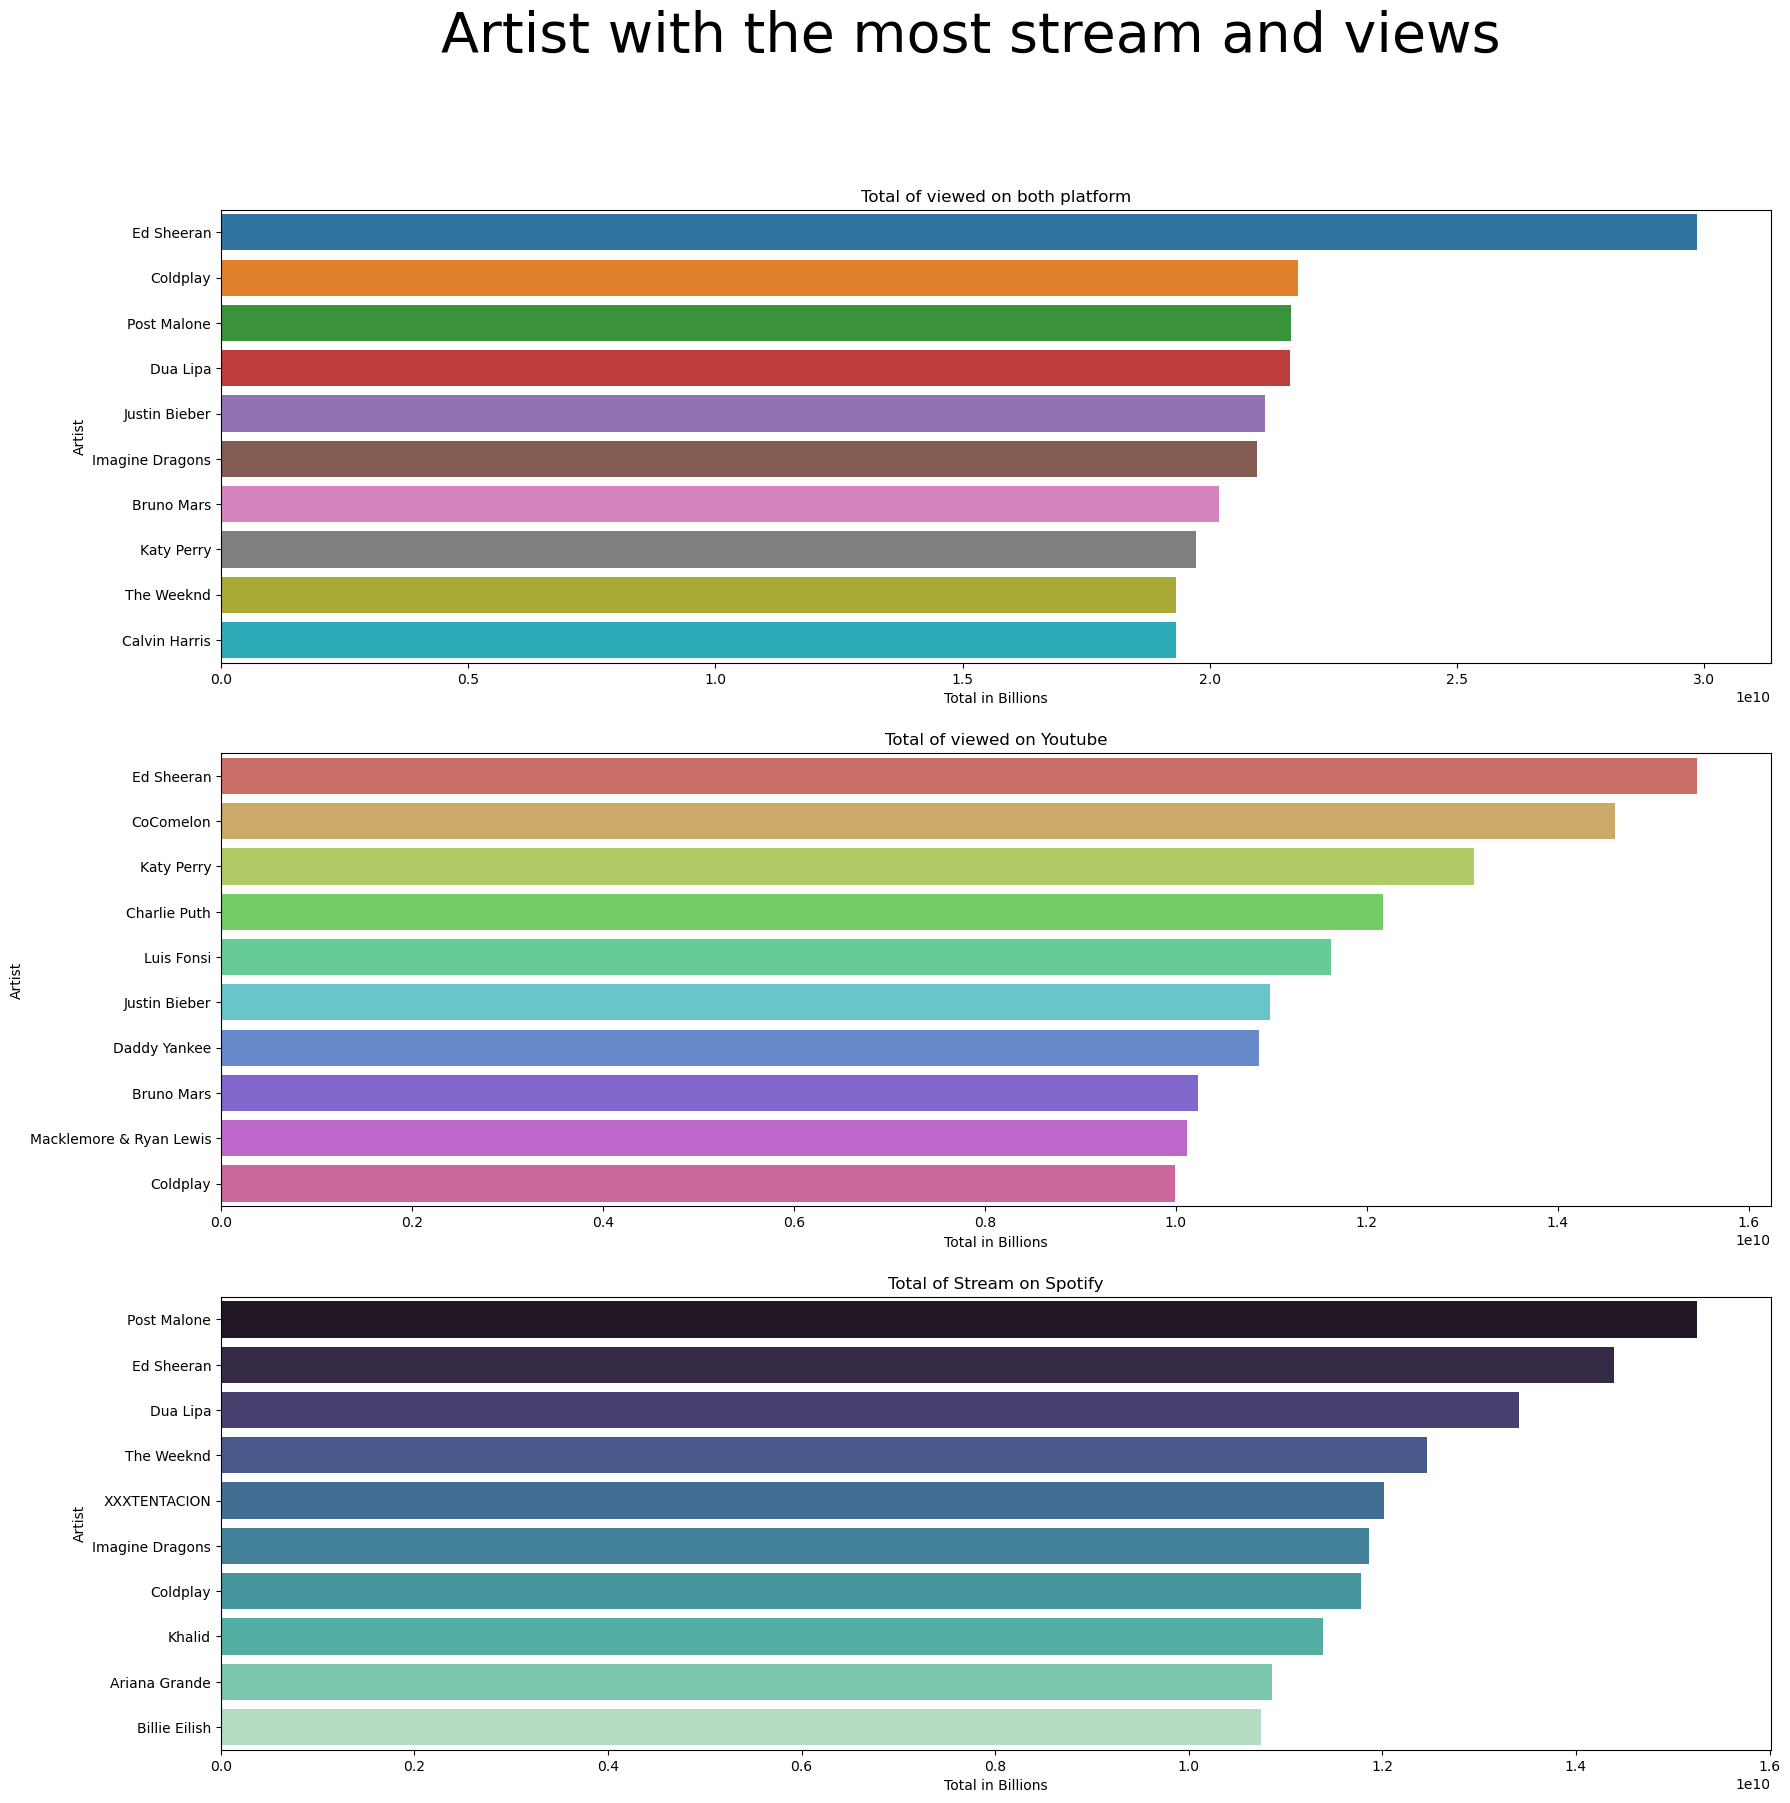

In [47]:
# Artist with the most stream and viewed
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(20,20))




most_popular_artist = data.groupby('Artist').sum()
most_popular_artist['TotalListened'] = most_popular_artist['Views'] +most_popular_artist['Stream']
most_popular_artist = most_popular_artist.sort_values('TotalListened',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist,y='Artist',x='TotalListened',ax=ax1)

ax1.set_xlabel("Total in Billions")
ax1.set_title("Total of viewed on both platform")

# Youtube

most_popular_artist_youtube = data.groupby('Artist').sum().sort_values('Views',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist_youtube,y='Artist',x='Views',palette='hls',ax=ax2)

ax2.set_xlabel("Total in Billions")
ax2.set_title("Total of viewed on Youtube")

# Spotify

most_popular_artist_spotify = data.groupby('Artist').sum().sort_values('Stream',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist_spotify,y='Artist',x='Stream',palette='mako',ax=ax3)

ax3.set_xlabel("Total in Billions")
ax3.set_title("Total of Stream on Spotify")

fig.suptitle("Artist with the most stream and views",fontsize=40)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\2374433346.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ed_sheeran = data.groupby(['Artist','Track']).sum().reset_index()


Text(0.5, 1.0, 'Most popular track by Ed Sheeran')

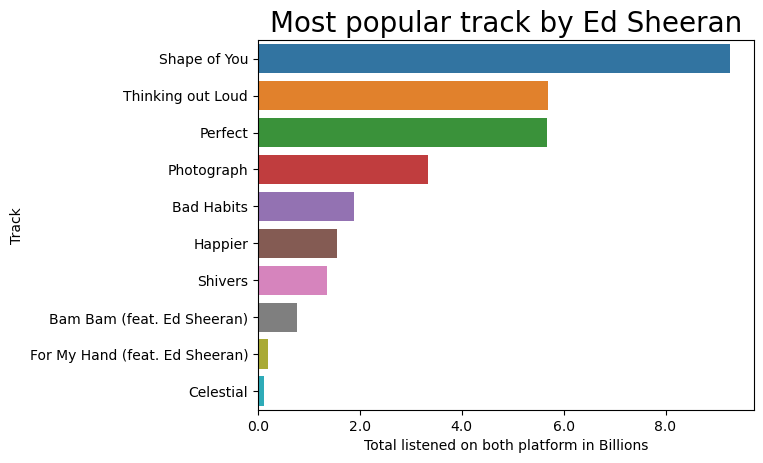

In [48]:
#most track that popular by Ed Sheeran
ed_sheeran = data.groupby(['Artist','Track']).sum().reset_index()
ed_sheeran = ed_sheeran[ed_sheeran['Artist'] == 'Ed Sheeran']
ed_sheeran['TotalListened'] = ed_sheeran.Views  + ed_sheeran.Stream
ed_sheeran = ed_sheeran.sort_values('TotalListened',ascending=False)

fig = sns.barplot(ed_sheeran,x='TotalListened',y='Track')
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total listened on both platform in Billions")
fig.set_title("Most popular track by Ed Sheeran",fontsize=20)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\3245324823.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Coldplay = data.groupby(['Artist','Track']).sum().reset_index()


Text(0.5, 1.0, 'Most popular track by Coldplay')

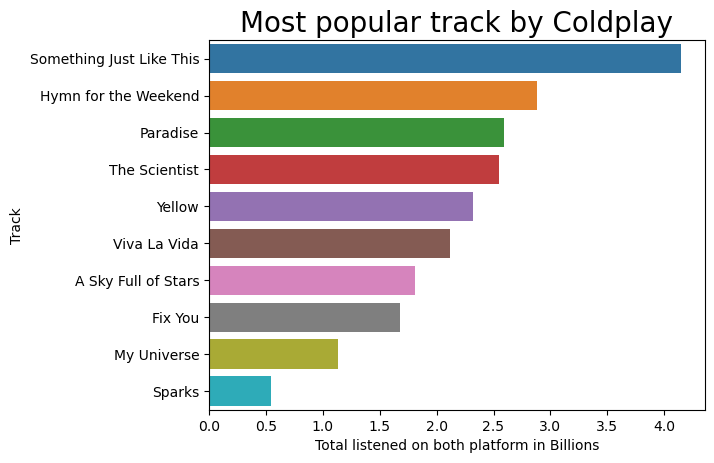

In [50]:
#most track that popular by Coldplay
Coldplay = data.groupby(['Artist','Track']).sum().reset_index()
Coldplay = Coldplay[Coldplay['Artist'] == 'Coldplay']
Coldplay['TotalListened'] = Coldplay.Views  + Coldplay.Stream
Coldplay = Coldplay.sort_values('TotalListened',ascending=False)

fig = sns.barplot(Coldplay,x='TotalListened',y='Track')
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total listened on both platform in Billions")
fig.set_title("Most popular track by Coldplay",fontsize=20)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\1059837152.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CoComelon = data.groupby(['Artist','Track']).sum().reset_index()
C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\1059837152.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CoComelon = Coldplay[CoComelon['Artist'] == 'CoComelon']


Text(0.5, 1.0, 'Most popular track by CoComelon')

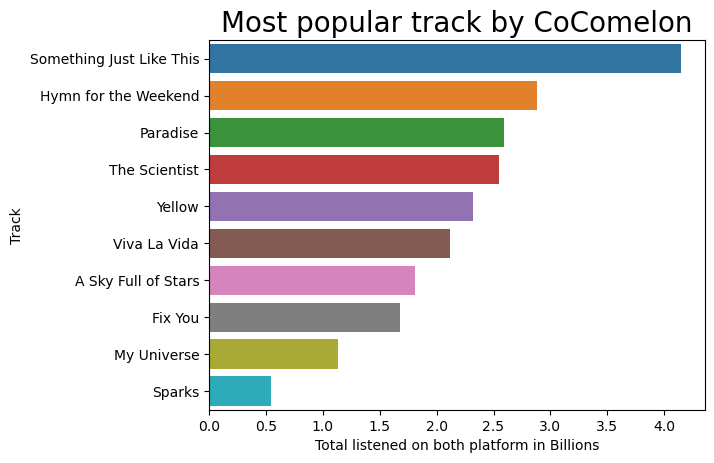

In [51]:
#most track that popular by CoComelon
CoComelon = data.groupby(['Artist','Track']).sum().reset_index()
CoComelon = Coldplay[CoComelon['Artist'] == 'CoComelon']
CoComelon['TotalListened'] = CoComelon.Views  + CoComelon.Stream
CoComelon = CoComelon.sort_values('TotalListened',ascending=False)

fig = sns.barplot(Coldplay,x='TotalListened',y='Track')
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total listened on both platform in Billions")
fig.set_title("Most popular track by CoComelon",fontsize=20)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\3156272343.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  danceability_track = data.groupby(['Track','Danceability']).sum().reset_index()


NameError: name 'Text' is not defined

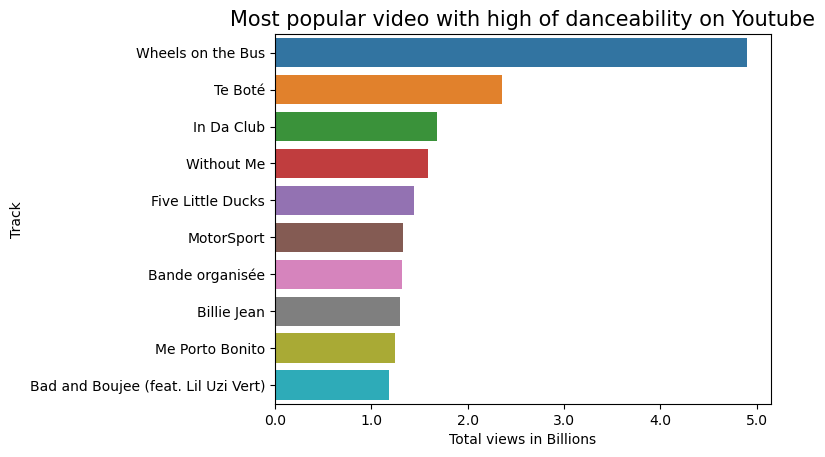

In [54]:
# most popular video with high of Danceability on Youtube
danceability_track = data.groupby(['Track','Danceability']).sum().reset_index()
danceability_track = danceability_track[danceability_track['Danceability'] > 0.9]\
.sort_values('Views',ascending=False).head(10)

fig = sns.barplot(danceability_track,y='Track',x='Views')
fig.set_title("Most popular video with high of danceability on Youtube",fontsize=15)
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total views in Billions")
Text(0.5, 0, 'Total views in Billions')


C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\4183862217.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  happy_track = data.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
C:\Users\ppbin\AppData\Local\Temp\ipykernel_1896\4183862217.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sad_track = data.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()


Text(0.5, 0.98, 'Most viewed track on happy and sad vibes')

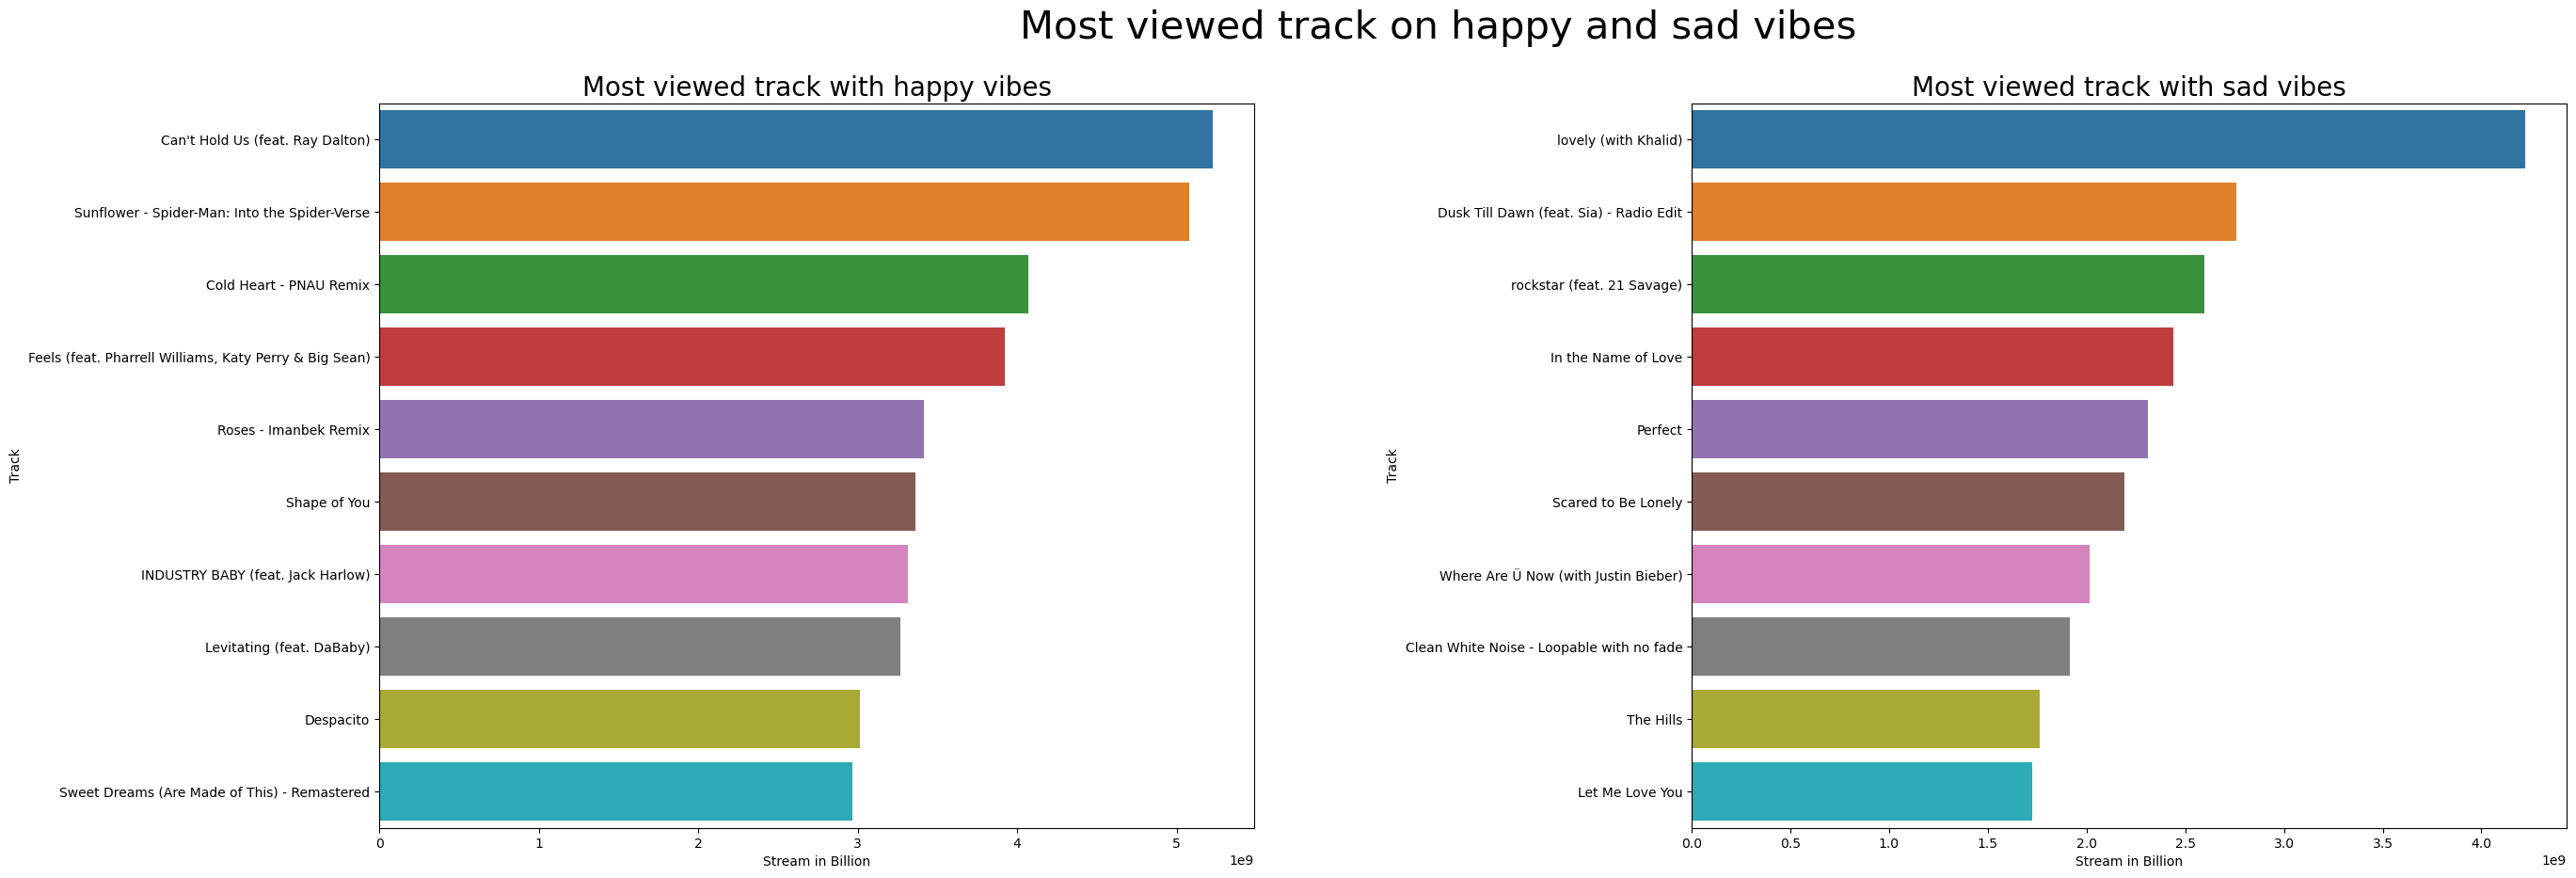

In [55]:
# what the most viewed cheerfull track and sad track on Spotify
fig ,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
fig.subplots_adjust(wspace=0.5)
# Valence with score above 0.8

happy_track = data.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
happy_track = happy_track[happy_track['Valence']>0.8].head(10)

sns.barplot(happy_track,x='Stream',y='Track',ax=ax1)
ax1.set_title("Most viewed track with happy vibes",fontsize=20)
ax1.set_xlabel("Stream in Billion")

# Valecne with score below 0.2

sad_track = data.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
sad_track = sad_track[sad_track['Valence']<0.2].head(10)

sns.barplot(sad_track,x='Stream',y='Track',ax=ax2)
ax2.set_title("Most viewed track with sad vibes",fontsize=20)
ax2.set_xlabel("Stream in Billion")

fig.suptitle("Most viewed track on happy and sad vibes",fontsize=30)

Text(0.5, 1.0, 'Relationship between views and likes on youtube videos')

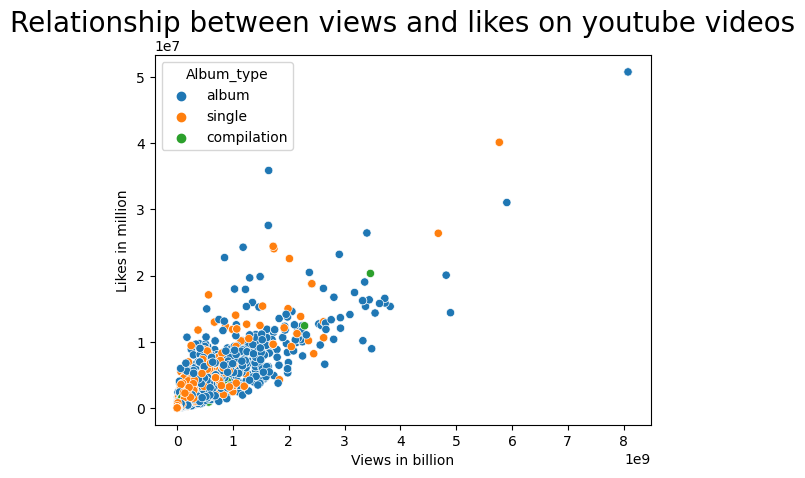

In [56]:
# relationship between variable views and likes on youtube videos
fig = sns.scatterplot(data,x='Views',y='Likes',hue='Album_type')
fig.set_ylabel("Likes in million")


fig.set_xlabel("Views in billion")
fig.set_title("Relationship between views and likes on youtube videos",fontsize=20)

Text(0.5, 1.0, 'Relationship between views on both platforms')

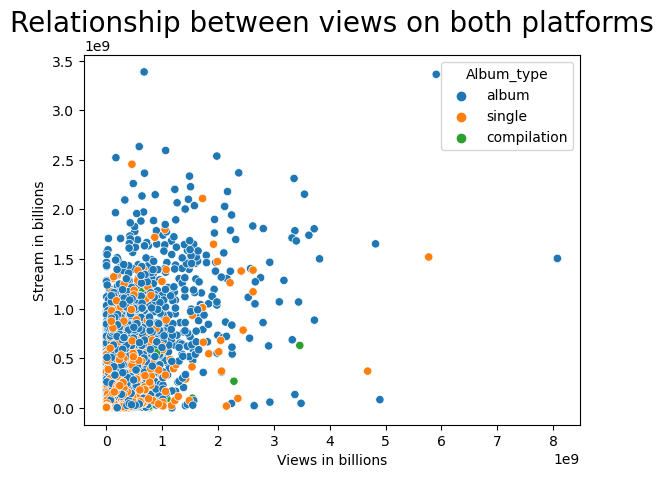

In [57]:
# relationship between variable views on youtube and stream on Spotify
fig = sns.scatterplot(data,x='Views',y='Stream',hue='Album_type')
fig.set_ylabel("Stream in billions")

fig.set_xlabel("Views in billions")
fig.set_title("Relationship between views on both platforms",fontsize=20)

Text(0.5, 1.0, 'Relationship between duration views')

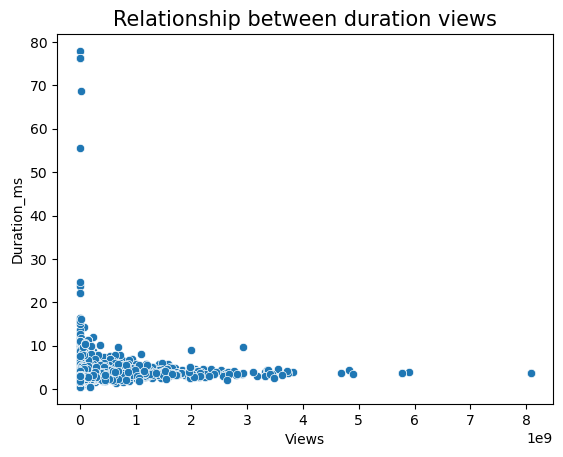

In [58]:
#  the relationship between duration and views
data_duration = data 
data_duration['Duration_ms'] = (data_duration['Duration_ms']/1000)/60
# Mili second to  minutes
fig = sns.scatterplot(data_duration,y='Duration_ms',x='Views')
fig.set_title("Relationship between duration views",fontsize=15)

# Model to predict views


In [59]:
#what features that have good relationship with variable stream,views and likes
features = """Danceability
Energy
Key
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
Stream
Views
Likes"""
features = features.split('\n')
features

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Stream',
 'Views',
 'Likes']

<Axes: >

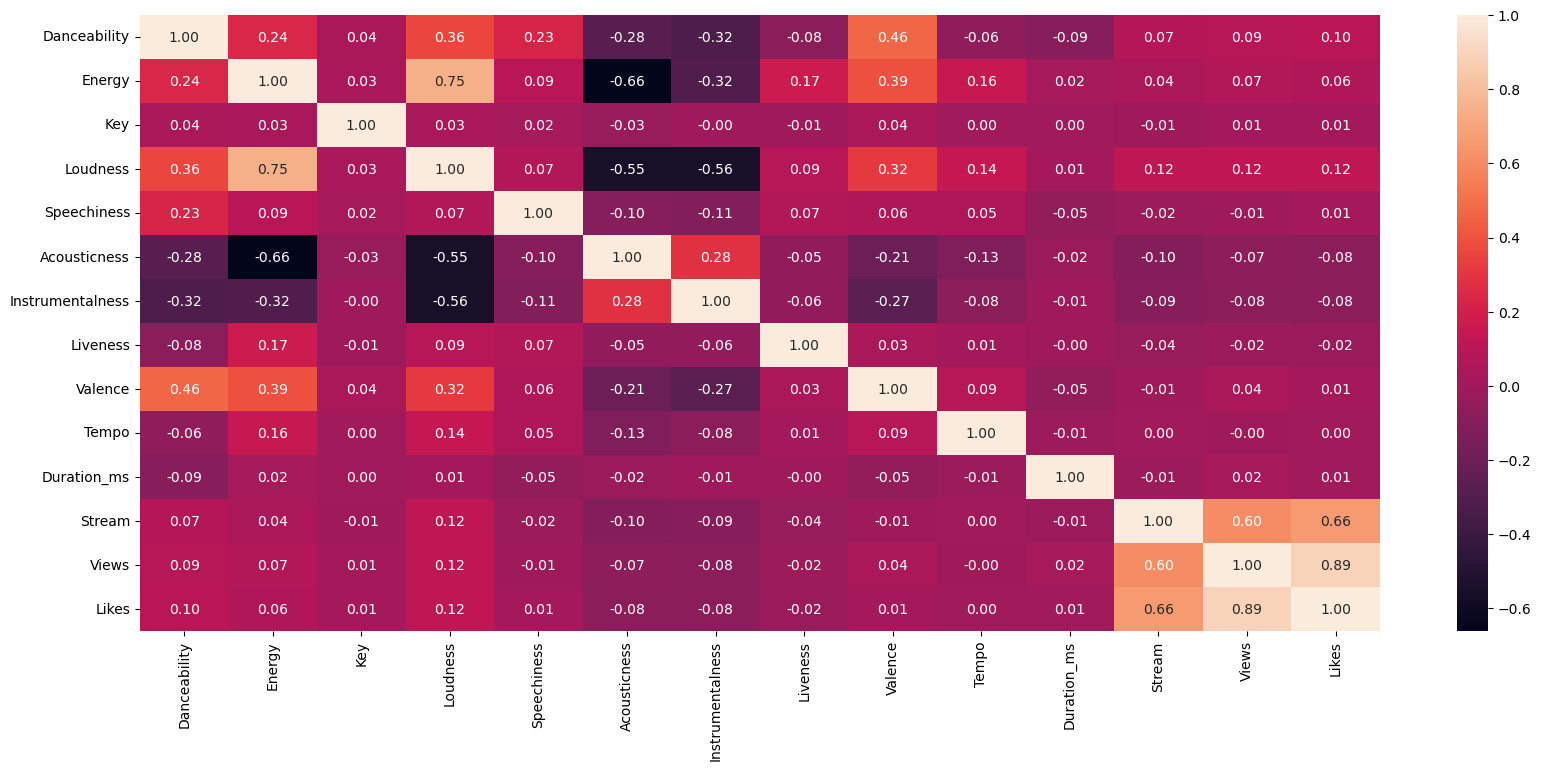

In [60]:
data_feat = data[features]
corr_data = data_feat.corr()
fig = plt.figure(figsize=(20,8))
sns.heatmap(corr_data,annot=True,fmt='.2f')

In [61]:
abs(corr_data['Views']).sort_values(ascending=False)[3:]

Loudness            0.118406
Danceability        0.089105
Instrumentalness    0.080820
Acousticness        0.069905
Energy              0.066530
Valence             0.038699
Duration_ms         0.021547
Liveness            0.017140
Key                 0.009293
Speechiness         0.008672
Tempo               0.001373
Name: Views, dtype: float64

In [62]:
abs(corr_data['Likes']).sort_values(ascending=False)[3:]

Loudness            0.123731
Danceability        0.099296
Instrumentalness    0.081171
Acousticness        0.078123
Energy              0.061980
Liveness            0.023562
Speechiness         0.014429
Valence             0.013986
Key                 0.007948
Duration_ms         0.005841
Tempo               0.002287
Name: Likes, dtype: float64

In [73]:
#one hot encoding on columns
data =pd.get_dummies(data)

In [74]:
from sklearn import preprocessing
X = data_feat.drop(columns=['Views','Stream','Likes'],axis=1)
y = data_feat['Views']
std_scaler = preprocessing.StandardScaler()

X_std = std_scaler.fit_transform(X)
# y_std = std_scaler.fit_transform(y)



In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, 
                                                  random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr= LogisticRegression()

In [79]:
model= lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [80]:
#evaluation matrices which we use for classification problem
#confusion matrix
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined